In [4]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = [c for c in train.columns if c not in["ID_code" , "target"]]

In [12]:
print(len(features))

200


In [13]:
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [14]:
train.isna().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [18]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [19]:
train.shape

(200000, 202)

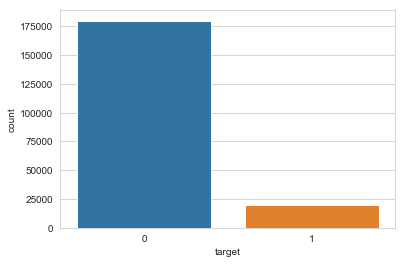

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
target = train['target']
train  = train.drop(["target" , "ID_code"] , axis = 1)
sns.set_style('whitegrid')
sns.countplot(target)

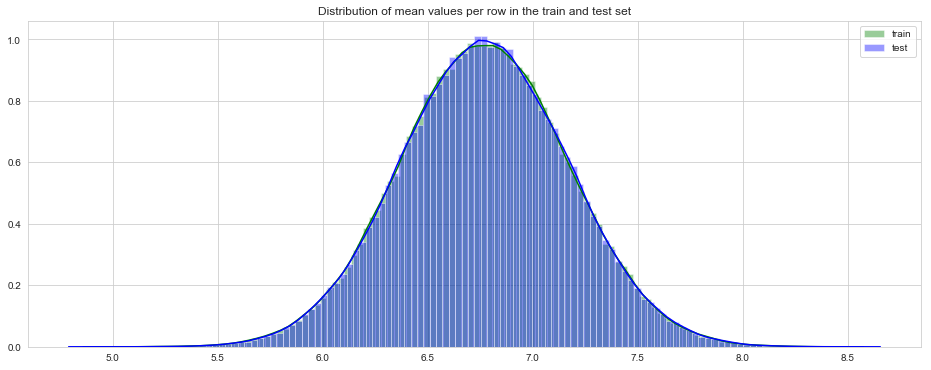

In [21]:
#CHECKING THE DISTRIBUTION OF MEAN AND STD DEV OF COLUMNS AND ROWS

plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

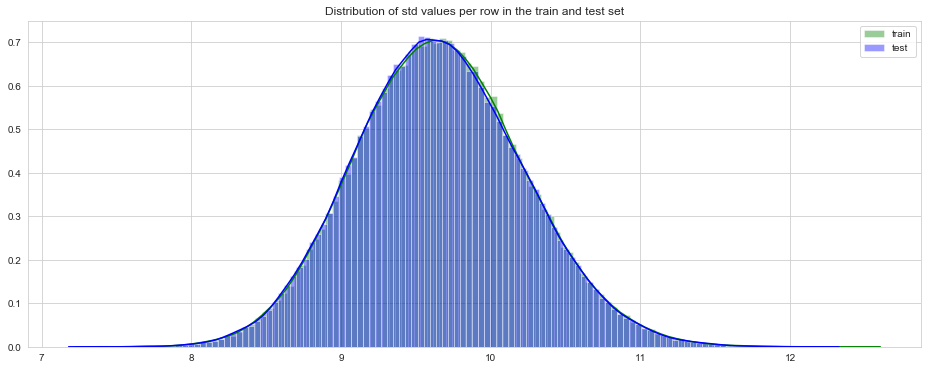

In [22]:
#STD DEV PER ROW
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

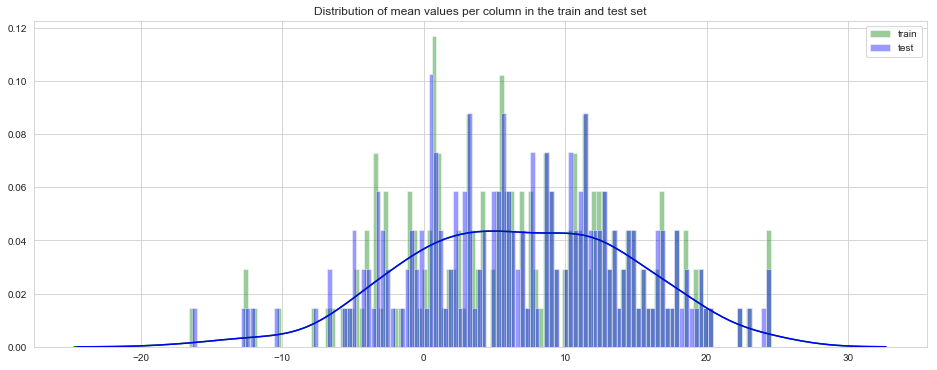

In [23]:
#MEAN VALUE DISTRIBUTION FOR COLUMNS IN TRAIN AND TEST SET
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

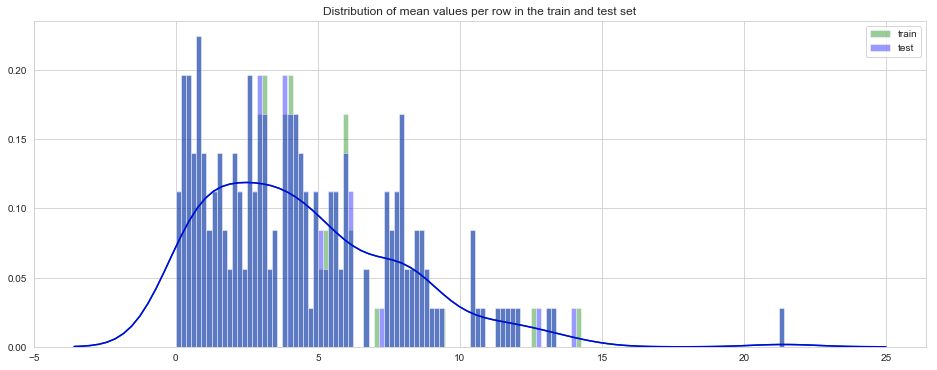

In [25]:
#STD VALUES PER COLUMN
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].std(axis=0),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [26]:
#PRINCIPLE COMPONENT ANALYSIS FOR DIMENSIONALITY REDUCTION
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)
PCA_train_x = PCA(2).fit_transform(train_scaled)
print(PCA_train_x.shape)

(200000, 2)


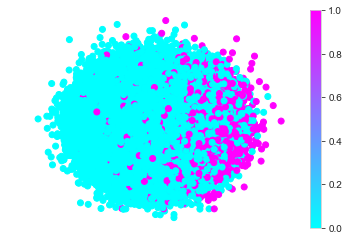

In [27]:
#PLOTTING THE RESULTS

plt.scatter(PCA_train_x[:,0] , PCA_train_x[:,1] , c = target , cmap = plt.cm.cool)
plt.axis("off")
plt.colorbar()
plt.show()

In [6]:
# DATA AUGMENTATION 
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y
        

In [29]:
#IMPORTING LIBRARIES REQUIRED TO MAKE THE MODEL
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm


In [33]:
#SETTING THE PARAMETERS FOR LGBM MODEL
#IMPROVEMENTS : USE GridSearchCV to optimize paramters more OR Use FE
params = {
            'bagging_freq' : 5,
            'bagging_fraction' : 0.335,
            'boost_from_average' : False,
            'boost' : 'gbdt',
            'num_threads' : 4,
            'learning_rate':0.0083,
            'max_depth':-1,
            'feature_fraction':0.041,
            'metric':'auc',
            'min_data_in_leaf': 80,
            'min_sum_hessian_in_leaf': 10.0,
            'num_leaves': 13,
            #'num_threads': 8,
            'tree_learner': 'serial',
            'objective': 'binary', 
            'verbosity': -1

}

In [7]:
train.shape

(200000, 202)

In [37]:
#TRAINING THE LIGHT GBM REGRESSOR
num_folds = 11
features = [c for c in train.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(target))
feature_importance_df = pd.DataFrame()

print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    
    X_train, y_train = train.iloc[trn_idx][features], target.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][features], target.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgbm.Dataset(X_tr, label=y_tr)
    val_data = lgbm.Dataset(X_valid, label=y_valid)
    val_data = lgbm.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])
    
    clf = lgbm.train(params, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.911632	valid_1's auc: 0.896584
[10000]	training's auc: 0.921453	valid_1's auc: 0.90081
[15000]	training's auc: 0.929002	valid_1's auc: 0.901684
Early stopping, best iteration is:
[15816]	training's auc: 0.930164	valid_1's auc: 0.901721
Fold idx:2
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.912109	valid_1's auc: 0.894669
[10000]	training's auc: 0.921908	valid_1's auc: 0.898078
[15000]	training's auc: 0.929371	valid_1's auc: 0.898806
[20000]	training's auc: 0.93619	valid_1's auc: 0.898702
Early stopping, best iteration is:
[16656]	training's auc: 0.931705	valid_1's auc: 0.898969
Fold idx:3
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.912772	valid_1's auc: 0.889395
[10000]	training's auc: 0.922487	valid_1's auc: 0.892583
[15000]	training's auc: 0.929892	valid_1's auc: 0.892884
Early stop

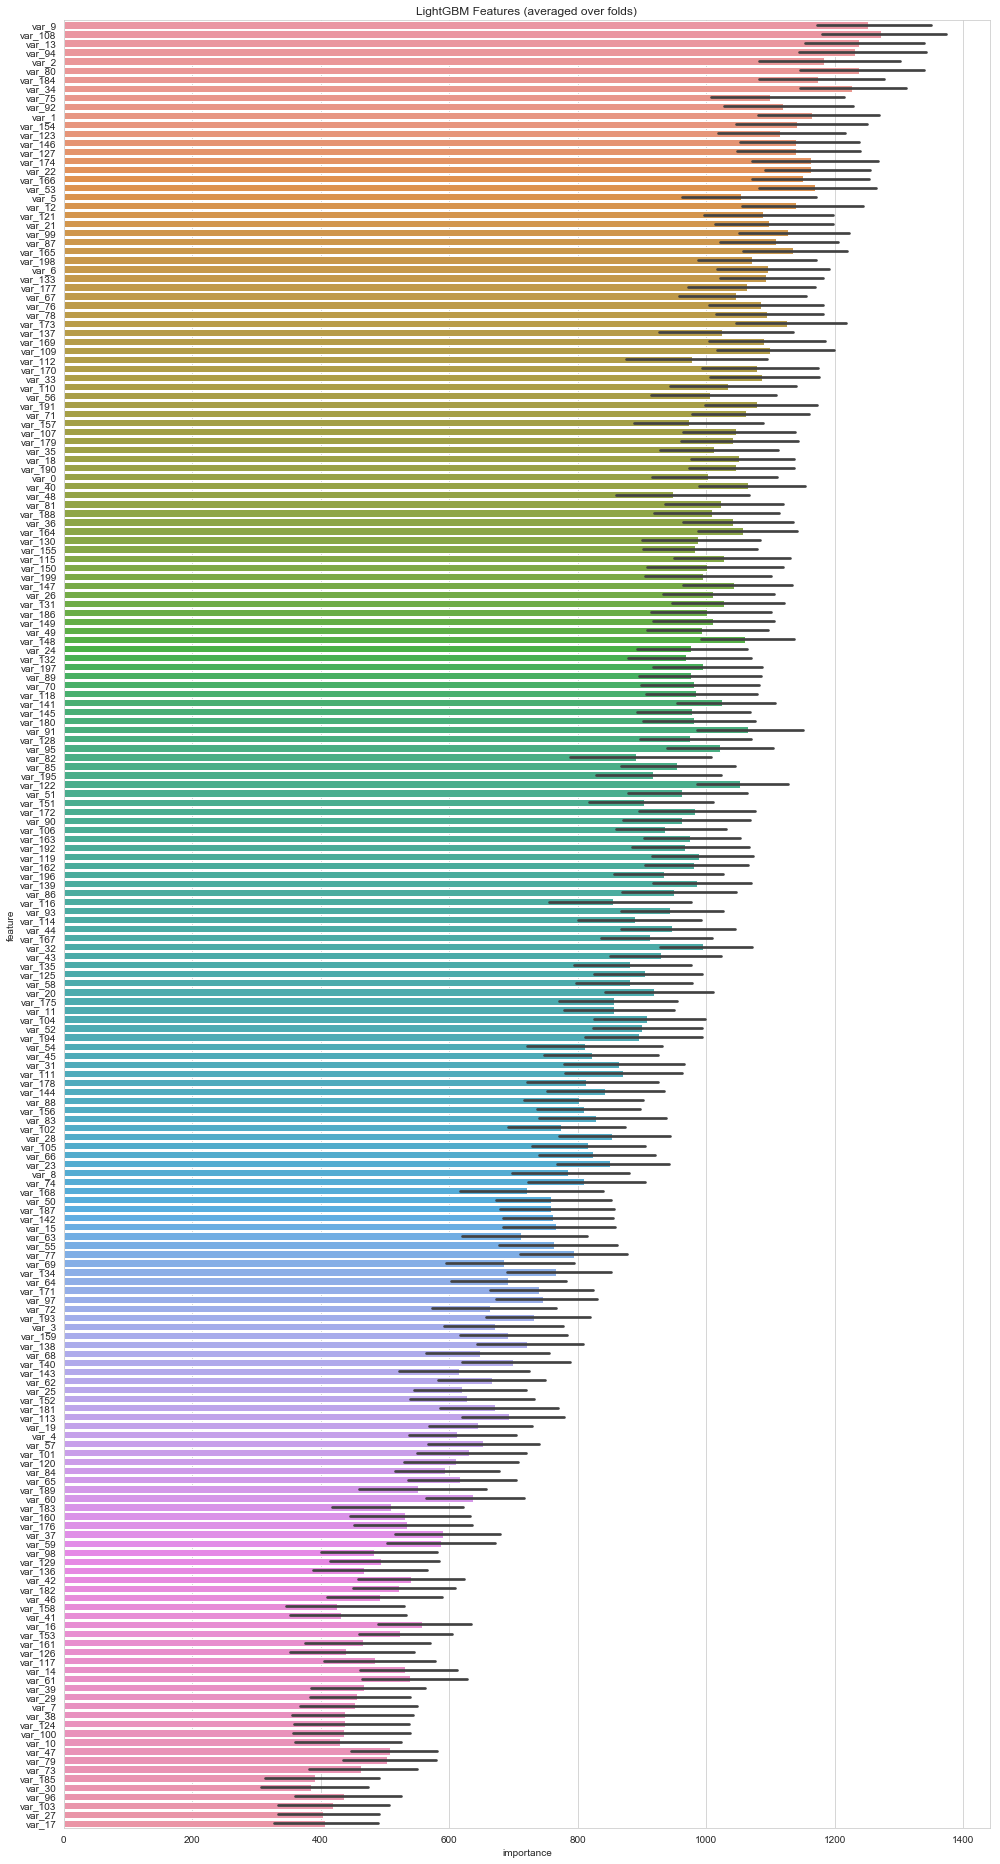

In [38]:
#PLOTTING THE FEATURE IMPORTANCE PLOT
cols = (feature_importance_df[["feature" , "importance"
                             ]].groupby("feature").mean().sort_values(by="importance", 
                                                                      ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_deature_imp.png')


In [39]:
num_sub = 1
print('Saving the Submission File')
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = predictions
sub.to_csv('submission{}.csv'.format(num_sub), index=False)
getValue = pd.DataFrame(getVal)
getValue.to_csv("Validation_kfold.csv")

Saving the Submission File


In [7]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold , RepeatedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [3]:
#USING VALIDATIOND AND PREVIOUS SUBMISSION FILES TO BE USED FOR STACKING BAYESIAN RIDGE REGRESSOR
oof_2 = pd.read_csv("Validation_kfold.csv")['0']

predictions = pd.read_csv("submission1.csv")["target"]

In [4]:
train = pd.read_csv('train.csv')
features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [5]:
target = train['target']
train = train.drop(["ID_code", "target"], axis=1)

In [11]:
#USING BAYESIAN RIDGE TO CREATE PREDICITIONS
train_stack = np.vstack([oof_2]).transpose()
test_stack = np.vstack([predictions]).transpose()

folds_stack = RepeatedKFold(n_splits=10, n_repeats=2, random_state=15)
oof_stack = np.zeros(train_stack.shape[0])
predictions_3 = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values
    
    clf_3 = BayesianRidge(n_iter= 100000)
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions_3 += clf_3.predict(test_stack) / 20

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
fold 11
fold 12
fold 13
fold 14
fold 15
fold 16
fold 17
fold 18
fold 19


In [12]:
# SAVING THE SAMPLE SUBMISSION
sp_sub = pd.read_csv("sample_submission.csv")
sp_sub['target'] = predictions_3
sp_sub.to_csv("submission_v4.csv" , index = False)